# TP - Sentiment Analysis

Almost equal to the first but now dataset is more balanced but still a bit unbalanced (we finish the phrase gathering phase)

- Complete dataset (finished validation)
- Still a little unbalanced
- TF-IDF


## Imports and loading data

In [ ]:
!python --version

Python 3.8.16


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# "Mount" do Google Drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_exp2.csv')

df

Mounted at /content/drive


,Phrase,Target
0,always experience gf gone first like oh cool m...,Neutral
1,right people maybe wont kill feel isolated lon...,Negative
2,know youre lonely come promise take care,Positive
3,give boost lonely she28ric,Positive
4,getting lonely top,Negative
...,...,...
2502,certainly another radar see lonely eyes follow...,Neutral
2503,69 girls always grow overnight meeting people ...,Neutral
2504,beauty power antiphons come come emmanuel rans...,Neutral
2505,rianbow gang hereee,Neutral


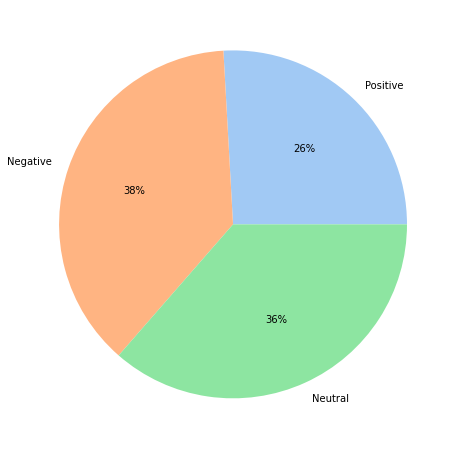

In [ ]:
# Class distribution

countPositives = df[df.Target == 'Positive'].Target.count()
countNegatives = df[df.Target == 'Negative'].Target.count()
countNeutral = df[df.Target == 'Neutral'].Target.count()

data = [countPositives,countNegatives,countNeutral]
labels = ['Positive', 'Negative', 'Neutral']

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## TF-IDF

### Implementation

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df.Phrase)
dense = vectors.todense()

df['vectorTdfIdf'] = dense.tolist()

In [ ]:
print(vectorizer.get_feature_names())

['000', '001', '02', '10', '100', '100x', '11', '12', '125', '13', '1312', '14', '145', '15', '19', '1950s', '1971', '20', '2006', '2011', '2013', '2014', '2015', '2017', '2018', '2019', '2020', '2021', '2022', '20s', '21', '22', '223', '23', '23th', '24', '25', '253days', '258', '263', '273', '2km', '2nd', '30', '300', '30pm', '30s', '33', '333', '35', '37', '3cmi0ko', '3days', '3l', '40', '40s', '42', '43', '4424', '45', '4929', '4am', '4ever', '4koma', '4th', '50', '504', '512', '663', '67', '69', '6v38pk0', '70', '70k', '75', '79', '7am', '7p', '80', '800', '82', '8255', '85', '89', '8th', '90', '90s', '911', '947', '95', 'a3', 'aaaaaalwaysssss', 'aaaaah', 'aaaah', 'aaron', 'aback', 'abandon', 'abandoned', 'abbey', 'ability', 'abject', 'able', 'abortion', 'about', 'absence', 'absolute', 'absolutely', 'abt', 'abundant', 'abuse', 'abusers', 'abusive', 'academic', 'academically', 'acads', 'acc', 'accentuated', 'accept', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'a

In [ ]:
df_final = pd.DataFrame(data = dense.tolist(), columns = vectorizer.get_feature_names())
df_final['Target'] = df.Target

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Columns: 5875 entries, 000 to Target
dtypes: float64(5874), object(1)
memory usage: 112.4+ MB


In [ ]:
from pycaret.classification import *

In [ ]:
# Pre-processing steps to fix target 

for i, value in enumerate(df_final['Target']):
  df_final['Target'][i] = value.strip()
  if value == 'Nuetral':
    df_final['Target'][i] = 'Neutral'

In [ ]:
df_final['Target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df_final

,000,001,02,10,100,100x,11,12,125,13,1312,14,145,15,19,1950s,1971,20,2006,2011,2013,2014,2015,2017,2018,2019,2020,2021,2022,20s,21,22,223,23,23th,24,25,253days,258,263,273,2km,2nd,30,300,30pm,30s,33,333,35,37,3cmi0ko,3days,3l,40,40s,42,43,4424,45,4929,4am,4ever,4koma,4th,50,504,512,663,67,69,6v38pk0,70,70k,75,79,7am,7p,80,800,82,8255,85,89,8th,90,90s,911,947,95,a3,aaaaaalwaysssss,aaaaah,aaaah,aaron,aback,abandon,abandoned,abbey,ability,abject,able,abortion,about,absence,absolute,absolutely,abt,abundant,abuse,abusers,abusive,academic,academically,acads,acc,accentuated,accept,acceptance,accepted,accepting,access,accessible,accessory,accident,accidentally,accommodations,accomplish,accomplished,according,accordingly,account,accountability,accountable,accounts,accumulate,accusations,accustomed,accutane,achieve,achieving,acid,acidosis,acknowledge,across,act,acting,action,activating,active,activities,activity,actors,acts,actual,actually,ad,adams,adapt,add,added,adderall,addicted,addiction,adding,additional,address,addressing,adhd,adj,adjust,adjustments,administered,admire,admit,adolescents,adopting,adorable,adoring,adorn,adrianna,ads,adult,adults,advanced,advances,advantage,advent,adventure,advertise,advertisers,advice,advise,advocates,aesthetic,aesthetically,af,affairs,affect,affection,affects,affinity,affliction,affluent,afford,afraid,africa,african,afterwards,age,ageless,agencies,agent,ages,agh,ago,agony,agree,agreement,ah,ahead,ahhh,ahhhhh,ai,aimed,aiming,aint,air,airpod,ajdhsahaaaaaaa,ajg,ajitators,albatross,alcohol,alcoholic,alcoholics,alex,alhamdulillah,alice,alicent,alicia,alien,alienated,alienation,alive,allah,allahs,allergies,allllllll,allow,...,wall,wallpaper,walls,wan,wandered,wanderer,wanna,want,wanted,wantibg,wanting,wants,war,warm,warmth,wars,wash,wasnt,waste,wasted,watch,watched,watches,watching,water,wave,waves,way,wayne,ways,wayyyy,wbssb,wdnacmn,weak,weakling,weakness,wealth,weaners,weaning,wear,wearing,wears,weather,web,wed,wedding,wednesday,wee,weed,week,weekdaysbut,weekend,weeks,weep,weighed,weighing,weighs,weight,weights,weighty,weird,weirdest,wel,welcome,well,wellbutrin,welp,wemen,wendell,wendy,went,wentt,werent,werk,western,westminster,weve,wey,whale,whatever,whats,whatsoever,whattttt,whence,whenever,whereof,wheres,whether,whichhhhhh,whining,whispers,whistleblower,whit,white,whoever,whole,wholesome,whore,whos,whys,wi,wibu,wicked,widens,widespread,widower,wife,wild,wilderness,wildness,wilhelm,wille,willed,williams,willing,willow,win,wind,windows,windswept,wine,wing,wings,winners,wins,winter,wiped,wise,wish,wishes,wishing,wit,withdraw,withdrawal,withdrawals,withholding,within,without,witness,wok,woke,wokeness,wolf,wolves,woman,women,wonder,wonderful,wondering,wont,woods,wooonn,wooooook,word,words,work,workable,worked,workers,working,workout,works,world,worlds,worn,worried,worry,worse,worst,worth,worthless,worthy,would,wouldnt,wow,wrap,wrapping,wreck,wrinkles,wrist,write,writer,writers,writing,written,wrong,wrote,wtf,wtv,wyd,xanax,xbox,xd,xe,xer,xx,ya,yada,yall,ye,yea,yeah,year,yearn,yearning,years,yell,yelling,yelped,yeonbin,yep,yes,yess,yesss,yesterday,yet,yh,yikes,yo,yoga,york,youd,youll,young,younger,youre,yourrrr,youth,youtube,youuu,youve,yr,yt,yummyyyy,zach,zapping,zaps,zel,zelink,zen,zero,zhdhshs,zhongli,zizzy,zodiacs,zoloft,zone,zzl,zzzzzzzzzz,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Classification with PyCaret

In [ ]:
# 70/30 - train and test split by default

exp_1 = setup(data=df_final, target='Target', numeric_features=df_final.drop(['Target'], axis=1).columns.tolist())

,Description,Value
0,session_id,3153
1,Target,Target
2,Target Type,Multiclass
3,Label Encoded,"Negative: 0, Neutral: 1, Positive: 2"
4,Original Data,"(2507, 5875)"
5,Missing Values,False
6,Numeric Features,5874
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['000', '001', '02',
                                                          '10', '100', '100x',
                                                          '11', '12', '125',
                                                          '13', '1312', '14',
                                                          '145', '15', '19',
                                                          '1950s', '1971', '20',
                                                          '2006', '2011',
                                 

In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6226,0.7953,0.5993,0.6283,0.6139,0.4154,0.4210,2.521
ridge,Ridge Classifier,0.6214,0.0000,0.6082,0.6208,0.6181,0.4194,0.4211,0.332
et,Extra Trees Classifier,0.6197,0.7895,0.5958,0.6263,0.6106,0.4102,0.4174,3.574
rf,Random Forest Classifier,0.6055,0.7850,0.5777,0.6188,0.5926,0.3857,0.3950,2.187
gbc,Gradient Boosting Classifier,0.5947,0.7644,0.5719,0.5971,0.5853,0.3724,0.3777,16.288
svm,SVM - Linear Kernel,0.5889,0.0000,0.5818,0.5911,0.5880,0.3746,0.3758,1.286
lightgbm,Light Gradient Boosting Machine,0.5821,0.7414,0.5676,0.5818,0.5788,0.3596,0.3613,0.893
ada,Ada Boost Classifier,0.5656,0.7067,0.5487,0.5671,0.5591,0.3322,0.3366,1.655
dt,Decision Tree Classifier,0.5507,0.6558,0.5385,0.5512,0.5481,0.3123,0.3137,0.608
lda,Linear Discriminant Analysis,0.4458,0.5917,0.4468,0.4555,0.4452,0.1664,0.1683,5.890


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3153, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3153,
                solver='auto', tol=0.001), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min

In [ ]:
cmp_results = pull()

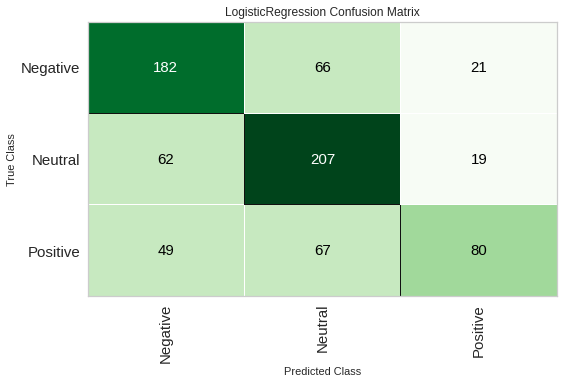

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[0], plot = 'confusion_matrix')

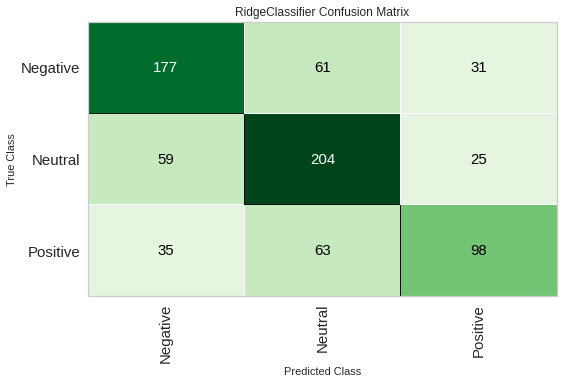

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[1], plot = 'confusion_matrix')

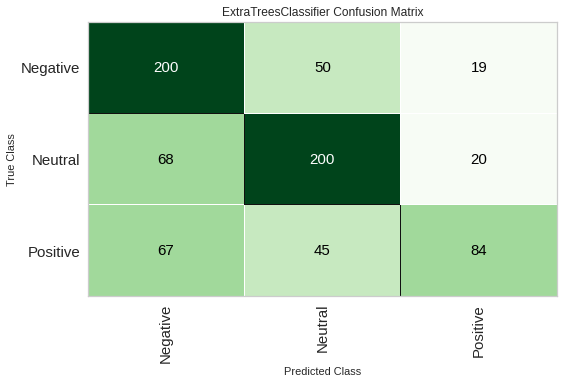

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(top3[2], plot = 'confusion_matrix')

In [ ]:
predict_model(top3[0])

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3153, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6228,0.8074,0.6012,0.6283,0.6153,0.4169,0.4223


,000,001,02,10,12,13,1312,14,145,15,...,zero,zhdhshs,zhongli,zizzy,zodiacs,zone,zzzzzzzzzz,Target,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.8828
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.7453
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.4714
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.5439
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Neutral,0.6321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative,Negative,0.5132
749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Neutral,0.4115
750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,Negative,0.3983
751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.4531


In [ ]:
bm_results = pull()

In [ ]:
cmp_results.to_csv('compare_results_exp2.csv')
bm_results.to_csv('best_model_results_exp2.csv')